<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/Prueba_de_hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importamos dataset de vinos
vinitos = pd.read_csv('/content/drive/MyDrive/Databases/Week 13/winemag-data-130k-v2.csv')

In [ ]:
vinitos.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
vinitos.drop('Unnamed: 0', axis=1,inplace= True)

In [ ]:
vinitos.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


### Prueba Z

Es la manera estadística de probar nuestra hipótesis si:
* Conocemos la varianza de la población o
* No conocemos la varianza, pero nuestra muestra es $n>=30$ \\

Tenemos que \\

$Z =\frac{\bar x - \mu}{\frac {\sigma}{\sqrt n}}$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$\sigma $ = Desviación estándar de la población \\
$n $= Tamaño de la muestra

Ejemplo:

En este dataset de reviews de vinos, vamos a asumir que los datos  de puntaje de los vinos están distribuidos de forma
normal.
--->Points: The number of points WineEnthusiast rated the wine on a scale of 1-100<---

Entonces definimos nuestra media poblacional ($\mu$) y desviación estándar ($\sigma$). Estos serán nuestros
parámetros. Estamos asumiendo aquí que los datos que tenemos son los datos de la población, sin muestreo.

In [ ]:
sns.set_style('darkgrid')

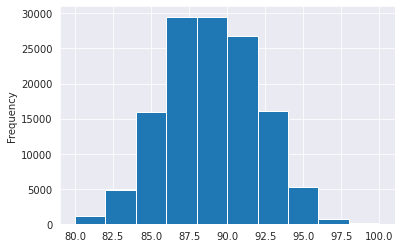

In [ ]:
vinitos.points.plot.hist()

In [ ]:
#Asginar puntos a points
points = vinitos.points
#calculo de media poblacional
mu = points.mean()
#Calculamos nuestra desviación estandar
sigma = points.std()

In [ ]:
mu

88.44713820775404

In [ ]:
sigma

3.0397302029162336

#Ejemplo
Suponiendo que tengo una muestra de n=10 puntajes de vinos con una media muestral de $\bar{x}$ = 90.2.
Esta muestra viene de la misma población que las evaluaciones que tengo aquí?

Para probar, vamos a utilizar una prueba z de 1 muestra. Primero, declaramos hipótesis nula e hipótesis alternativa:

$H_0$: La muestra es de la misma población de enólogos -> $\bar{x} = \mu$

$H_A$: La muestra no viene de la misma población de enólogos -> $\bar{x} \neq \mu$

Enseguida, específicamos qué nivel de significancia vamos a utilizar. En estadística, un nivel de signficancia común
es el de $\alpha \leq 0.05$. Vamos a comprobar utilizando un $\alpha = 0.05$

Luego, vamos a nuestra [tabla z] para buscar el valor crítico de z que corresponde con este nivel de significancia.
Nuestra prueba tendrá 2 colas porque no nos importa si la media muestral es mayor o menor que la media poblacional.
Solamente estamos probando si son iguales o diferentes.

[tabla z]: https://www.sjsu.edu/faculty/gerstman/StatPrimer/z-two-tails.pdf

In [ ]:
#Validando en la tabla z
z_test = 1.96
#Media me la muestra
x_bar = 90.2
#cantidad de datos de la muestra
n= 10

Calculamos el valor de z para nuestra media muestral comparada con la media poblacional dividiendo la diferencia
entre las dos medias entre la desviación estándar de la muestra, que es el error estándar: $\frac{\sigma}{\sqrt{n}}$.

Si este estadístico es menor que nuestro valor crítico de z, entonces no rechazamos la hipótesis nula; de
lo contrario, rechazamos la hipótesis nula en favor de la alternativa.

In [ ]:
standard_error = sigma/np.sqrt(n)

In [ ]:
standard_error

0.96124709136211

In [ ]:
z_stat = (x_bar-mu)/standard_error

In [ ]:
if z_stat < z_test:
    print(f'El valor de z es {z_stat}, menor que {z_test}. \nNo rechazamos la hipótesis nula: la media muestral '
          f'no es significativamente distinta de la media poblacional.')
else:
    print(f'El valor de z es {z_stat}, mayor que {z_test}. \nRechazamos la hipótesis nula: la media muestral es '
          f'significativamente distinta de la media poblacional.')

El valor de z es 1.823528838731901, menor que 1.96. 
No rechazamos la hipótesis nula: la media muestral no es significativamente distinta de la media poblacional.


In [ ]:
#Que pasaría si la muestra fuera más grande con la misma media
n= 30
standard_error = sigma/np.sqrt(n)
z_stat = (x_bar-mu)/standard_error

In [ ]:
if z_stat < z_test:
    print(f'El valor de z es {z_stat}, menor que {z_test}. \nNo rechazamos la hipótesis nula: la media muestral '
          f'no es significativamente distinta de la media poblacional.')
else:
    print(f'El valor de z es {z_stat}, mayor que {z_test}. \nRechazamos la hipótesis nula: la media muestral es '
          f'significativamente distinta de la media poblacional.')

El valor de z es 3.1584445977507256, mayor que 1.96. 
Rechazamos la hipótesis nula: la media muestral es significativamente distinta de la media poblacional.


In [ ]:
#Si tenemos una diferencia significativa entre las dos media.
#Esto significa que la distribucion de las medias se hace más angosta  si n crece
#Por lo tanto, es menos probable que ambas medias se lleguen a intersectar.


![alt text](https://andyjconnelly.files.wordpress.com/2017/05/distributions1.png 'Ejemplo Normal vs T-Student')

### Prueba T

En el ejercicio anterior, asumimos que conocemos la media y desviación estándar poblacional, entonces estamos
comparando nuestra muestra con esta población. Sin embargo, durante la mayoría de las veces no vamos a conocer estos
datos.

Nos permite medir nuestra hipótesis cuando:
* No conocemos la varianza de la población
* Nuestra muestra es pequeña, n < 30 

$t$ = $
\frac {\bar x - \mu}{\frac {s}{\sqrt n}}
$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$s $ = Desviación estándar de la muestra \\
$n $= Tamaño de la muestra

### Prueba T de 1 Muestra

Supongamos que tengo una muestra y quiero comparar con un valor específico. En nuestro ejemplo, vamos a suponer que
yo sé que la evaluación promedio de los vinos en Francia es de 88, y quiero saber si los vinos nuevos ("Nouveau") tiene
una media de evaluación semejante a la población general. Voy a probar lo mismo con los vinos que están designados
como "Prestige"

En este caso, usamos una Prueba T de 1 sola muestra, ya que estamos comparando el valor de esta media con un valor de
 referencia (benchmark).

Nuestras hipótesis:

$H_0$: $\bar{x} - \mu = 0$ - es decir, no hay diferencia entre la media muestral y $\mu$.

$H_A$: $\bar{x} - \mu \neq 0$ - prueba de dos colas

$\alpha = 0.05$

Aquí veo en mi [tabla T]

[tabla T]: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf


In [ ]:
vinos_frances = vinitos['points'][vinitos.country=='France']

In [ ]:
mu = vinos_frances.mean()
mu

88.84510931064138

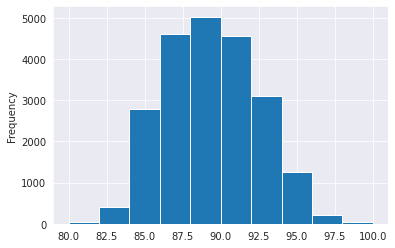

In [ ]:
vinos_frances.plot.hist()

In [ ]:
#Tomar 100 muestras aleatorias de toda la población de vinos
#Calcular la media de estas muestras aleatorias
#Regresar el valor para hacer diferentes tipos de prueba de hipotesis
def generate_means(data):
  means =[]
  for i in range(1000):
    #Obteniendo muestras de mi población de 100 en 100
    samples = np.random.choice(data,100,replace=True)
    #Calcular la media de mis muestras
    means.append(samples.mean())
  return means




In [ ]:
medias_francia = generate_means(vinos_frances)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


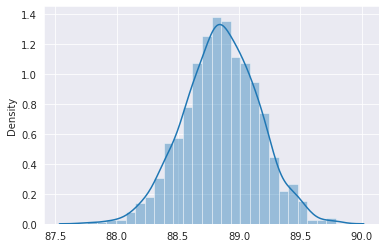

In [ ]:
sns.distplot(medias_francia, hist=True,kde=True)
plt.show()

In [ ]:
#Obtener los vinos que su caracterista es que sean Nouveau
nouveau = vinitos['points'][(vinitos.country=='France')&(vinitos.designation=='Nouveau')]


In [ ]:
nouveau.mean()

85.32432432432432

In [ ]:
#Vamos a usar stats para hacer nuestra prueba t 
t, p = stats.ttest_1samp(nouveau,mu)

#Nos regresa el valor de t al inicio
#Recordemos que un valor de t pequeño nos dice que neustros grupos son similares
#Caso contrario, un valor de t grande nos dice que no son similares
#Cuando es muy pequeño, significa que hay diferencia significativa (menor)
#Cuando es mayor, hay diferencia significativa (mayor)

#Los valores p nos interesan que sean bajos,
#Significa que un valor de p indica una fuerte evidencia en contra de H_0
#Caso contrario, no tendríamos evidencia de si es nula nuestra H_=
print(t,p)

-19.801986102576723 6.082659615924452e-21


In [ ]:
#Visualizar que tan diferentes son las medias
#Es decir, como se comportan nuestros datasets de Francia y Nouvea

medias_nouveau = generate_means(nouveau)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


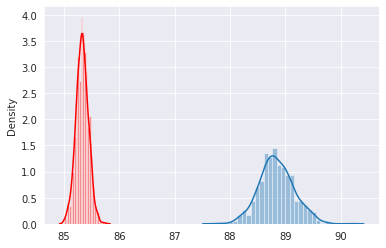

In [ ]:
#Graficar con distplot
sns.distplot(medias_francia, hist= True, kde=True)
sns.distplot(medias_nouveau, hist= True, kde=True, color ='red')
plt.show()


In [ ]:
#Vamos a ver este mismo análisis pero con los vinos Prestige
prestige = vinitos['points'][(vinitos.country=='France')&(vinitos.designation=='Prestige')]

In [ ]:
prestige.mean()

88.0

In [ ]:
t, p = stats.ttest_1samp(prestige,mu)
print(t,p)

-2.6044888135679285 0.011427039851169333


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


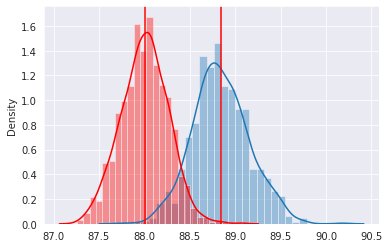

In [ ]:
medias_prestige = generate_means(prestige)

sns.distplot(medias_francia, hist= True, kde=True)
sns.distplot(medias_prestige, hist= True, kde=True, color ='red')
#Mostramos donde esta nuestra media
plt.axvline(mean(medias_prestige),color='r')
plt.axvline(mean(medias_francia),color='r')
plt.show()

#Dos pruebas de hipótesis comunes
* Matches Pairs
* Independent Samples

# Matched Pairs

Significa que los datos en las dos muestras son dependientes. (las dos muestras son dependientes, contienen al mismo grupo de personas)

Por ejemplo: \\
Se ha conducido un estudio para investigar la efectividad del hipnotismo en la reducción del dolor. Los resultados para sujetos aleatorios seleccionados estan mostrados a continuación.

Antes | Después | Diferencia
---: | ---: | ---:
6.8 | 6.6 | 0.2
2.4 | 6.5 | -4.1
7.4 | 9 | -1.6
8.5 | 10.3 | -1.8
8.1 | 11.3 | -3.2
6.1 | 8.1 | -2
3.4 | 6.3 | -2.9
2 | 11.6 | -9.6

En promedio, las mediciones sensoriales son mas bajas después del hipnotismo? Con el 95%

$H_0$: No hay una mejora en la percepcion del dolor despues de la hipnosis \\
$H_a$: Si hay una mejora en la percepcion del dolor despues de la hipnosis

In [ ]:
from scipy.stats import ttest_rel, ttest_1samp


In [ ]:
mediciones_dict = {'antes':[6.8, 2.4, 7.4, 8.5, 8.1, 6.1, 3.4, 2], 'despues':[6.6, 6.5, 9, 10.3, 11, 8.1, 6.3, 11.6]}

In [ ]:
medicionesDF = pd.DataFrame.from_dict(mediciones_dict)
medicionesDF

,antes,despues
0,6.8,6.6
1,2.4,6.5
2,7.4,9.0
3,8.5,10.3
4,8.1,11.0
5,6.1,8.1
6,3.4,6.3
7,2.0,11.6


In [ ]:
#Aplicar nuestra prueba de t para 2 muestras relacionadas
t, p = ttest_rel(medicionesDF.antes, medicionesDF.despues)
#Una valor de t pequeño significa que la media del depués es poco inferior
#a la media del antes

print(t,p)

-2.9986241010889545 0.019980979447274314


In [ ]:
medicionesDiferencia = medicionesDF.antes - medicionesDF.despues

In [ ]:
# Al hacer este test_1samp con la diferencia de los valores de neutros datos
#dependientes, si lo compramos con cero, estamos intentando validar que NO
#hay difenrecia en el dolor despues del hipnotismo
t, p = ttest_1samp(medicionesDiferencia, 0)

print(t,p)

-2.9986241010889545 0.019980979447274314


---



**Independent Samples**

Consideramos aquellos casos  en los que tenemos dos o más ejemplos que no hacen match entre ellos. Por ejemplo A/B test en páginas web dado que un usuario ve una interfaz diferente a los otros. 

Se deben cumplir ciertos estatutos:


1.   Independencia de los datos: Que un dato no afecte al otro
2.   Las muestras fueron tomadas aleatoriamente de una población que se distribuye normalmente

Podemos tener dos casos:


1.   Varianzas iguales 
2.   Varianzas diferentes

Nuesta hipótesis aquí son:

$
H_0 = \mu_1 = \mu_2 \\
H_1 = \mu_1 \neq \mu_2
$

Se tiene información de dos pruebas que se hicieron en un sitio de e-commerce:

a | b 
---: | ---: 
.27 | 13.61 
6.08 | 21.53
13.74 | 9.23
9.70 | 5.36
7.0| 12.90

Asumimos que las varianzas son las mismas (dado previo conocimiento de los datos). Ahora, con un 95% de grado de confianza, vamos a validar si hay o no diferencia.

$H_0$: Dado el layout que se le mostro al usuario, no hubo cambio alguno en las variables \\
$H_a$: Dado el layout que se le mostro al usuario, afecto las variables

In [ ]:
ab_test = pd.read_csv('/content/drive/MyDrive/Databases/Week 13/ab_test.csv')
ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [ ]:
from scipy.stats import ttest_ind
#Supongamos que nuestra varianzas son iguales
ttest_ind(ab_test.a, ab_test.b, equal_var=True)
#Rechazamos la hipotesis nula.

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [ ]:
#Supongamos que nuestra varianzas son diferentes
ttest_ind(ab_test.a, ab_test.b, equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828825)